##**TEXT TO SQL GENERATION**
**Team:**
- Naveen Kumar Pasala
- Shiva Naga Jyothi Cherukuri
- Yash Gaikward

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# installing datasets and transformers for the model
! pip install datasets
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.6 MB/s eta 0:00:00


###**Loading Data:**

In [ ]:
# loading the Dataset from Huggingface
from datasets import load_dataset
dataset = load_dataset("b-mc2/sql-create-context",split="train")
dataset = dataset.train_test_split(test_size = 0.20)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'context', 'answer'],
        num_rows: 62861
    })
    test: Dataset({
        features: ['question', 'context', 'answer'],
        num_rows: 15716
    })
})

In [ ]:
train_dataset = dataset['train']
test_dataset = dataset['test']

###**Data Preporcessing:**

In [ ]:
train_dataset = train_dataset.train_test_split(test_size = 0.20)

In [ ]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['question', 'context', 'answer'],
        num_rows: 50288
    })
    test: Dataset({
        features: ['question', 'context', 'answer'],
        num_rows: 12573
    })
})

In [ ]:
validation_dataset = train_dataset['test']
train_dataset = train_dataset['train']

In [ ]:
#Converting to pandas format
train_dataset.set_format("pandas")
validation_dataset.set_format("pandas")
test_dataset.set_format("pandas")
df_train = train_dataset[:]
df_test = test_dataset[:]
df_validation = validation_dataset[:]
df_train.head()

,question,context,answer
0,Which round had Michael Schumacher in the pole...,"CREATE TABLE table_1132600_3 (round VARCHAR, w...",SELECT COUNT(round) FROM table_1132600_3 WHERE...
1,Who narrated when the vessel operator is de be...,CREATE TABLE table_26168687_3 (narrated_by VAR...,SELECT narrated_by FROM table_26168687_3 WHERE...
2,"What is Score, when Away Team is ""Thame United""?","CREATE TABLE table_name_67 (score VARCHAR, awa...",SELECT score FROM table_name_67 WHERE away_tea...
3,"Who was the opponent on September 13, 1992?","CREATE TABLE table_name_10 (opponent VARCHAR, ...",SELECT opponent FROM table_name_10 WHERE date ...
4,What was the GDP for 2002-2005 for the constru...,CREATE TABLE table_25282151_1 (supply_sector__...,SELECT 2002 AS _2005 FROM table_25282151_1 WHE...


In [ ]:
df_train.shape

(50288, 3)

In [ ]:
df_validation.head()

,question,context,answer
0,What is the sport played in Iowa City on Febru...,"CREATE TABLE table_name_17 (sport VARCHAR, sit...","SELECT sport FROM table_name_17 WHERE site = ""..."
1,when english is tea how many nihon-shiki,CREATE TABLE table_26263954_1 (nihon_shiki VAR...,SELECT nihon_shiki FROM table_26263954_1 WHERE...
2,"When the home team was South Melbourne, what d...","CREATE TABLE table_name_64 (away_team VARCHAR,...",SELECT away_team AS score FROM table_name_64 W...
3,what is the part number when the release date ...,CREATE TABLE table_name_99 (part_number_s_ VAR...,SELECT part_number_s_ FROM table_name_99 WHERE...
4,What is the highest number of people in attend...,CREATE TABLE table_name_92 (attendance INTEGER...,SELECT MAX(attendance) FROM table_name_92 WHER...


In [ ]:
df_validation.shape

(12573, 3)

###**Checking for Missing Values:**

In [ ]:
df_train.isnull().sum()

question    0
context     0
answer      0
dtype: int64

In [ ]:
df_test.isnull().sum()

question    0
context     0
answer      0
dtype: int64

In [ ]:
df_validation.isnull().sum()

question    0
context     0
answer      0
dtype: int64

**Therefore, there are no Missing values in our corpus**

###**Data Exploration:**

In [ ]:
# importing the libraries required
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.DataFrame()

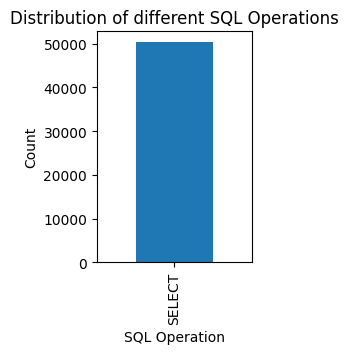

In [ ]:
# Bar Plot for SQL Operations
df['operation'] = df_train['answer'].apply(lambda x: x.split()[0])
plt.figure(figsize=(2, 3))
df['operation'].value_counts().plot(kind='bar')
plt.title('Distribution of different SQL Operations')
plt.xlabel('SQL Operation')
plt.ylabel('Count')
plt.show()

**In our corpus, we have only select queries, hence we are limiting the scope to only select queries**

In [ ]:
from wordcloud import WordCloud

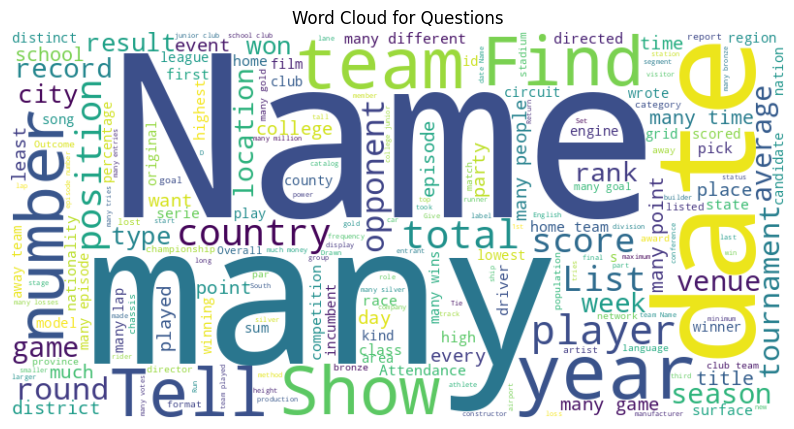

In [ ]:
# Word Cloud for questions
sql_keywords_ques = ' '.join(df_train['question'].apply(lambda x: ' '.join(x.split()[:3])))  # Considering the first three words as keywords
wordcloud_ques = WordCloud(width=800, height=400, background_color='white').generate(sql_keywords_ques)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ques, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Questions')
plt.show()

**Above is the word-cloud demonstrating the most Commonly used words in Questions column of corpus**

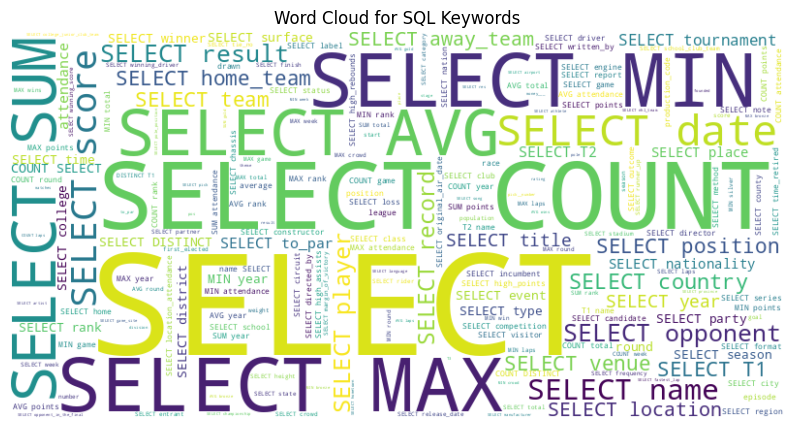

In [ ]:
# Word Cloud for SQL Keywords
sql_keywords = ' '.join(df_train['answer'].apply(lambda x: ' '.join(x.split()[:3])))  # Considering the first three words as keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sql_keywords)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for SQL Keywords')
plt.show()

**Above is Word Cloud representating the most commonly used words for performing operations in SQL queries, in our corpus**

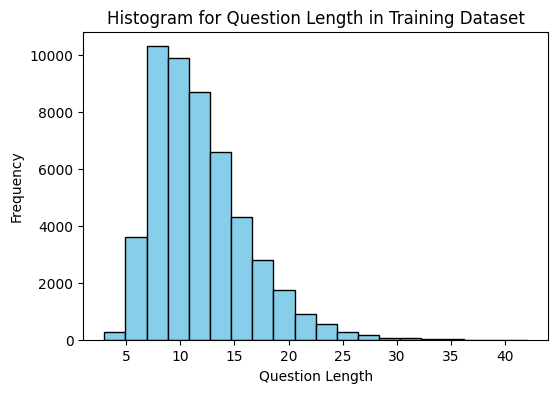

In [ ]:
# Histogram for Question Length
df['question_length'] = df_train['question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 4))
plt.hist(df['question_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Question Length in Training Dataset')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

**Above is the histogram plot for understanding the frequency of question lengths, most of the questios are of lengths around 8-12.**

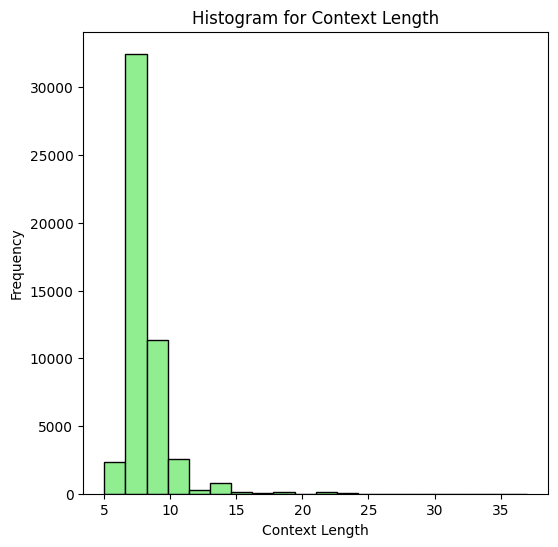

In [ ]:
# Histogram for Context Length
df['context_length'] = df_train['context'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 6))
plt.hist(df['context_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram for Context Length')
plt.xlabel('Context Length')
plt.ylabel('Frequency')
plt.show()

**generated is the histogram plot for context length, the length of most of the contexts were of length around 8.**

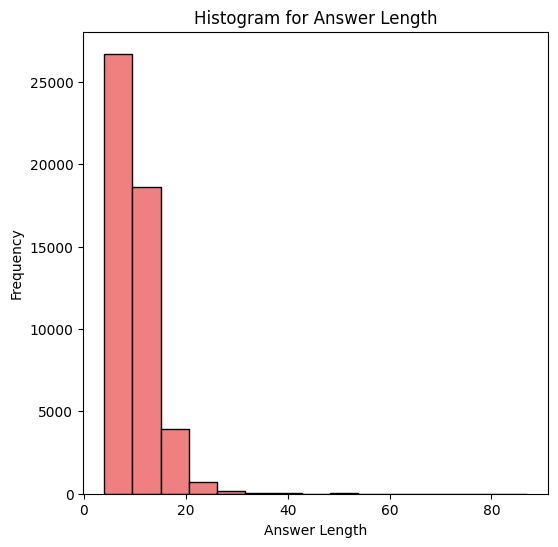

In [ ]:
# Histogram for Answer Length
df['answer_length'] = df_train['answer'].apply(lambda x: len(x.split()))
plt.figure(figsize=(6, 6))
plt.hist(df['answer_length'], bins=15, color='lightcoral', edgecolor='black')
plt.title('Histogram for Answer Length')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()

**Displaying the histogram plot for understanding the SQL Query lenghts for generation.**

In [ ]:
#displaying the head of training data
df_train.head()

,question,context,answer
0,Which round had Michael Schumacher in the pole...,"CREATE TABLE table_1132600_3 (round VARCHAR, w...",SELECT COUNT(round) FROM table_1132600_3 WHERE...
1,Who narrated when the vessel operator is de be...,CREATE TABLE table_26168687_3 (narrated_by VAR...,SELECT narrated_by FROM table_26168687_3 WHERE...
2,"What is Score, when Away Team is ""Thame United""?","CREATE TABLE table_name_67 (score VARCHAR, awa...",SELECT score FROM table_name_67 WHERE away_tea...
3,"Who was the opponent on September 13, 1992?","CREATE TABLE table_name_10 (opponent VARCHAR, ...",SELECT opponent FROM table_name_10 WHERE date ...
4,What was the GDP for 2002-2005 for the constru...,CREATE TABLE table_25282151_1 (supply_sector__...,SELECT 2002 AS _2005 FROM table_25282151_1 WHE...


###**Model Selection and Fine-tuning:**

In [ ]:
! pip install accelerate -U
! pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
df_train_results = pd.DataFrame()
dict_eval_results = {}

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

# tokenizing using Autotokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-base")

def preprocess_function(examples):
  inputs = examples["question"] + " " + examples["context"]
  targets = examples["answer"]
  model_inputs = tokenizer(inputs, max_length=1024, truncation=True)
  with tokenizer.as_target_tokenizer():
    labels = tokenizer(targets, max_length=1024, truncation=True)
  return {"input_ids": model_inputs["input_ids"], "attention_mask": model_inputs["attention_mask"], "labels": labels["input_ids"]}

# Training the model

train_dataset = df_train.apply(preprocess_function, axis=1)
validation_dataset = df_validation.apply(preprocess_function, axis=1)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,
    num_train_epochs=10,
    warmup_steps=100,
    logging_steps=100,
    evaluation_strategy="epoch",
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator=data_collator,
)

df_train_results = trainer.train()
dict_eval_results = trainer.evaluate()

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3856: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
You're using a BartTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method 

Epoch,Training Loss,Validation Loss
1,0.145400,0.108762
2,0.112900,0.086124
3,0.088400,0.077051
4,0.073500,0.069131
5,0.067200,0.067530
6,0.050900,0.064644
7,0.057300,0.063678
8,0.045000,0.062222
9,0.043300,0.061937
10,0.043500,0.061797


In [ ]:
#saving the model and model state
trainer.save_model('/content/drive/MyDrive/Saved Models/NL2SQL')
trainer.save_state()

In [ ]:
type(df_train_results)

transformers.trainer_utils.TrainOutput

In [ ]:
df_train_results

TrainOutput(global_step=31430, training_loss=0.09167235410406906, metrics={'train_runtime': 3476.2575, 'train_samples_per_second': 144.661, 'train_steps_per_second': 9.041, 'total_flos': 1.983942386270208e+16, 'train_loss': 0.09167235410406906, 'epoch': 10.0})

In [ ]:
dict_eval_results

{'eval_loss': 0.061797093600034714,
 'eval_runtime': 21.4578,
 'eval_samples_per_second': 585.939,
 'eval_steps_per_second': 36.63,
 'epoch': 10.0}

###**Generating the predicted queries for test dataset:**

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def generate_sql_query(question, context):
    inputs = question + " " + context
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, return_tensors="pt")
    model_inputs = {k: v.to(device) for k, v in model_inputs.items()}  # Move tensors to appropriate device
    with torch.no_grad():
        outputs = model.generate(model_inputs['input_ids'], attention_mask=model_inputs['attention_mask'])
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
# Generate predictions for test dataset
predicted_queries = []
for i in range(len(df_test)):
    predicted_query = generate_sql_query(df_test.iloc[i]['question'], df_test.iloc[i]['context'])
    predicted_query = predicted_query.lower().replace('"', "'")
    predicted_queries.append(predicted_query)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
import re

# Function to standardize the actual and predicted queries for performing the accuracy metrices
def standizing_query(query):
    datatype_pattern = r'\b(?:decimal|integer|varchar|char|bool)\b\s*\(*\)*\*?'
    modified_query = re.sub(datatype_pattern, '', query.lower(), flags=re.IGNORECASE)
    modified_query = re.sub(r'[\'"]', '', modified_query)
    return modified_query

In [ ]:
actual_queries = df_test['answer'].tolist()

#standarizing the actual and predicted queries
actual_queries_2 = [standizing_query(query) for query in actual_queries]
predicted_queries_2 = [standizing_query(query) for query in predicted_queries]

###**Evaluation Metrics:**

**Rouge Scorer:**

In [ ]:
!pip install rouge

In [ ]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=4b738241b790208fa5bb30ae3573730045cdcd3568746b25e30e619b3af17807
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
import numpy as np
from rouge import Rouge
from rouge_score import rouge_scorer

# Calculating the Rouge Score
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
rouge_scores = [scorer.score(act, pred)['rougeL'].fmeasure for act, pred in zip(actual_queries, predicted_queries)]

print("ROUGE-L scores:", rouge_scores)
print(f"Average ROUGE scores on test data: {np.mean(rouge_scores)}")

ROUGE-L scores: [0.8571428571428571, 1.0, 0.9600000000000001, 0.8275862068965517, 0.88, 1.0, 0.9565217391304348, 0.8461538461538461, 0.9166666666666666, 0.8181818181818182, 0.9090909090909091, 0.9166666666666666, 0.9, 0.9565217391304348, 1.0, 1.0, 0.5161290322580645, 1.0, 0.8571428571428571, 0.6666666666666666, 0.9523809523809523, 0.9, 0.8275862068965517, 0.8461538461538461, 0.9473684210526316, 0.761904761904762, 0.7586206896551725, 1.0, 0.846153846153846, 1.0, 0.7333333333333334, 1.0, 1.0, 0.8695652173913044, 0.9473684210526316, 0.9523809523809523, 0.8333333333333333, 0.25, 0.9565217391304348, 0.9473684210526316, 0.7857142857142858, 0.9090909090909091, 0.7333333333333334, 0.9090909090909091, 1.0, 0.9523809523809523, 1.0, 1.0, 0.7142857142857143, 0.6896551724137931, 1.0, 0.9600000000000001, 0.8799999999999999, 1.0, 0.9523809523809523, 0.9, 0.8148148148148148, 1.0, 0.6666666666666667, 0.8, 0.7200000000000001, 1.0, 1.0, 0.6875000000000001, 1.0, 1.0, 0.8148148148148148, 0.9600000000000001

**Accuracy:**

In [ ]:
#Calculating the Accuracy
correct_predictions = sum(1 for pred, truth in zip(predicted_queries_2, actual_queries_2) if pred == truth)
total_predictions = len(actual_queries)
accuracy = correct_predictions / total_predictions
print(f"Accuracy on test dataset: {accuracy * 100:.2f}%")

Accuracy on test dataset: 26.93%


###**Generating the query for user input**

In [ ]:
# Taking the user input for the question and context and generating the SQL query from the model.
def main():
    question = input("Enter a question: ")
    context = input("Enter a context: ")
    sql_query = generate_sql_query(question, context)
    print("Generated SQL query:", sql_query)

if __name__ == "__main__":
    main()

Enter a question: Give me the names of employees who has salary more than 1000?
Enter a context: CREATE TABLE employee (employee_name VARCHAR(10), salary integer)
Generated SQL query: SELECT employee_name FROM employee WHERE salary > 1000
